In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 


In [2]:
from PIL import Image
import os

In [22]:
image_files = [f for f in os.listdir('dataset/cats') if f.endswith('.jpg')]
images = []
counter=0
cats_train=[]
cats_test=[]

for i in image_files:
    img_path = os.path.join('dataset/cats', i)
    img = Image.open(img_path)
    counter+=1
    if(counter<=56):
        img_array = np.array(img)
        cats_train.append(img_array)
    else:
        img_array=np.array(img)
        cats_test.append(img_array)

In [23]:
image_files = [f for f in os.listdir('dataset/dogs') if f.endswith('.jpg')]
images = []
counter=0
dogs_train=[]
dogs_test=[]

for i in image_files:
    img_path = os.path.join('dataset/dogs', i)
    img = np.array(Image.open(img_path))
    counter+=1
    if(counter<=56):
        img_array = np.array(img)
        dogs_train.append(img_array)
    else:
        img_array=np.array(img)
        dogs_test.append(img_array)

In [26]:
len(dogs_train),len(dogs_test),len(cats_train),len(cats_test)

(56, 14, 56, 14)

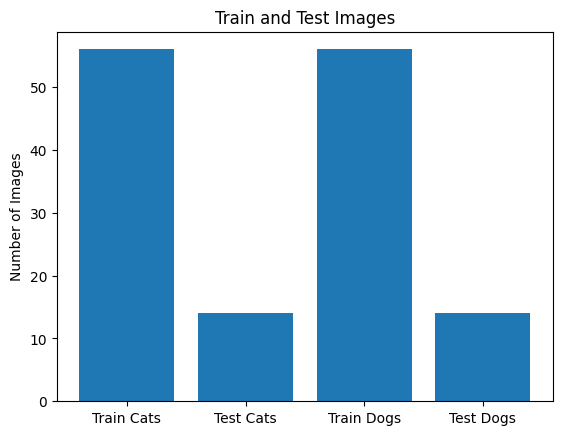

In [10]:
# plot the bar graph for the counts of train and test cats and dogs images

objects = ('Train Cats', 'Test Cats', 'Train Dogs', 'Test Dogs')
y_pos = np.arange(len(objects))
performance = [len(cats_train),len(cats_test),len(dogs_train),len(dogs_test)]
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Images')
plt.title('Train and Test Images')
plt.show()
